# 第4章 PandasとMatplotlibを使ってみよう
## 4.1 データのダウンロード

In [28]:
import pandas_datareader.data as web
start="1949/5/16"
end="2016/9/30"#適当に入れ替えてください。
N225 = web.DataReader("NIKKEI225", 'fred',start,end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [29]:
N225.tail(1)

,NIKKEI225
DATE,
2016-09-30,16449.84


Text(0,0.5,'N225 index')

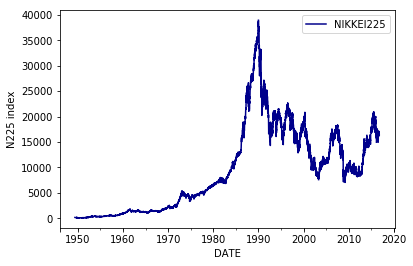

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

Text(0,0.5,'N225 index')

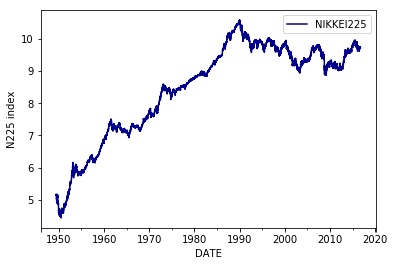

In [31]:
%matplotlib inline
import numpy as np
np.log(N225).plot(color='darkblue')
plt.ylabel('N225 index')

plt.show()を追加することにより出力の仕方が変わりました。

In [58]:
import datetime
end=datetime.datetime.now()
start="1970/1/3"
price = web.DataReader("^N225", 'yahoo',start,end)
price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1970-01-05,2402.850098,2402.850098,2402.850098,2402.850098,0.0,2402.850098
1970-01-06,2406.219971,2406.219971,2406.219971,2406.219971,0.0,2406.219971
1970-01-07,2394.959961,2394.959961,2394.959961,2394.959961,0.0,2394.959961
1970-01-08,2283.679932,2283.679932,2283.679932,2283.679932,0.0,2283.679932
1970-01-09,2283.679932,2283.679932,2283.679932,2283.679932,0.0,2283.679932


In [33]:
print(price.tail(1))

                    High           Low          Open         Close  Volume  \
Date                                                                         
2019-06-21  21497.820312  21392.449219  21487.669922  21422.320312     0.0   

               Adj Close  
Date                      
2019-06-21  21422.320312  


## 4.2 データベースの加工

In [34]:
import pandas as pd
fx = web.DataReader('DEXJPUS',"fred",start,end)
port=pd.concat([price.Close,fx],axis=1).dropna()

Text(0,0.5,'correlation')

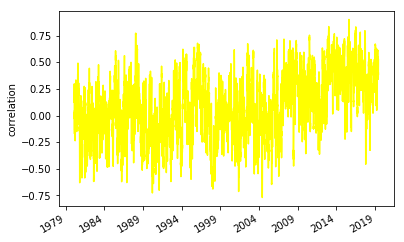

In [35]:
n=port.Close.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')

                    High           Low          Open         Close    Volume  \
Date                                                                           
2015-01-05  17540.919922  17219.220703  17325.679688  17408.710938  116500.0   
2015-01-06  17111.359375  16881.730469  17101.580078  16883.189453  166000.0   

               Adj Close  
Date                      
2015-01-05  17408.710938  
2015-01-06  16883.189453  


Text(0,0.5,'N225')

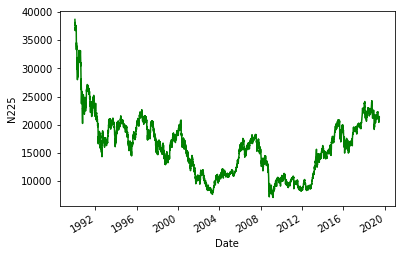

In [44]:
price1=price.loc["1990/1/1":]#ixの停止によりlocに変更
price1.Close.plot(color='green')
price2=price["2015"].iloc[0:2]#ixの停止によりilocに変更
print(price2)
plt.ylabel('N225')

In [37]:
print(price.resample('M').first().tail())

                    High           Low          Open         Close   Volume  \
Date                                                                          
2019-02-28  20929.630859  20741.980469  20797.029297  20788.390625  82200.0   
2019-03-31  21641.580078  21490.019531  21490.019531  21602.689453  62600.0   
2019-04-30  21682.939453  21471.119141  21500.890625  21509.029297  77400.0   
2019-05-31  22190.490234  21875.109375  22184.400391  21923.720703  90700.0   
2019-06-30  20438.029297  20305.740234  20327.869141  20410.880859  67400.0   

               Adj Close  
Date                      
2019-02-28  20788.390625  
2019-03-31  21602.689453  
2019-04-30  21509.029297  
2019-05-31  21923.720703  
2019-06-30  20410.880859  


In [38]:
print(price.resample('M').last().tail())

                    High           Low          Open         Close   Volume  \
Date                                                                          
2019-02-28  21536.550781  21364.089844  21536.550781  21385.160156  71500.0   
2019-03-31  21267.250000  21149.419922  21228.509766  21205.810547  61600.0   
2019-04-30  22270.289062  22073.099609  22167.480469  22258.730469  71900.0   
2019-05-31  20823.099609  20581.580078  20785.210938  20601.189453  79100.0   
2019-06-30  21497.820312  21392.449219  21487.669922  21422.320312      0.0   

               Adj Close  
Date                      
2019-02-28  21385.160156  
2019-03-31  21205.810547  
2019-04-30  22258.730469  
2019-05-31  20601.189453  
2019-06-30  21422.320312  


In [39]:
print(price.resample('M',loffset='1d').last().tail())

                    High           Low          Open         Close   Volume  \
Date                                                                          
2019-03-01  21536.550781  21364.089844  21536.550781  21385.160156  71500.0   
2019-04-01  21267.250000  21149.419922  21228.509766  21205.810547  61600.0   
2019-05-01  22270.289062  22073.099609  22167.480469  22258.730469  71900.0   
2019-06-01  20823.099609  20581.580078  20785.210938  20601.189453  79100.0   
2019-07-01  21497.820312  21392.449219  21487.669922  21422.320312      0.0   

               Adj Close  
Date                      
2019-03-01  21385.160156  
2019-04-01  21205.810547  
2019-05-01  22258.730469  
2019-06-01  20601.189453  
2019-07-01  21422.320312  


Text(0,0.5,'apple')

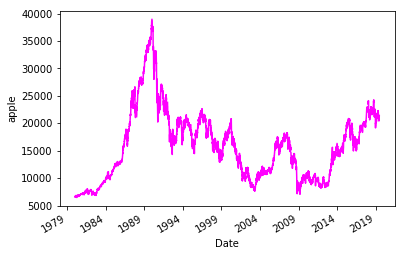

In [40]:
price.resample('A').Close.plot(color='magenta')
plt.ylabel('apple')

## 4.3 データの加工、分析


In [41]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std()*np.sqrt(250)
print(vol,len(price))

0.21686463260252753 9721


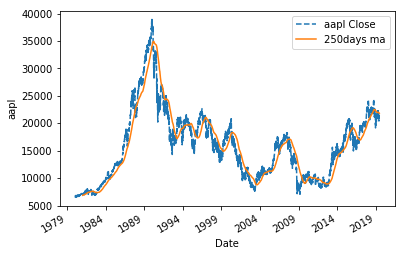

In [42]:
import pandas as pd
ma=pd.Series.rolling(price.Close,window=250).mean()
price.Close.plot(label='aapl Close',style='--')
ma.plot(label='250days ma')
plt.ylabel('aapl')
plt.legend()

Text(0,0.5,'standrd deviation 250 days aapl')

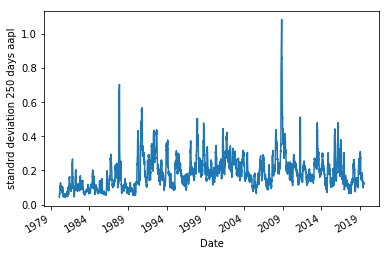

In [43]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=25).std()*np.sqrt(250)).plot()
plt.ylabel('standrd deviation 250 days n225')